Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay


Loading the dataset

In [2]:
# Load the dataset
file_path = "/content/PupilBioTest_PMP_revA.csv"
data = pd.read_csv(file_path)

In [3]:
data

,strand,CpG_Coordinates,`000,`001,`010,`011,`100,`101,`110,`111,Sample_ID,Replicate,Tissue
0,r,10035:10044:10046,1077,9,0,0,0,0,0,4,1,Rep2,cfDNA
1,r,10035:10044:10053,1086,0,0,0,0,0,0,4,1,Rep2,cfDNA
2,r,10035:10044:10058,1069,17,0,0,0,0,0,4,1,Rep2,cfDNA
3,r,10035:10044:10071,1072,14,0,0,0,0,0,4,1,Rep2,cfDNA
4,r,10035:10044:10075,1086,0,0,0,0,0,0,4,1,Rep2,cfDNA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15392178,f,9998:10121:10133,76,0,0,0,0,0,0,0,80,Rep1,Islet
15392179,f,9998:10121:10140,47,0,0,0,0,0,0,0,80,Rep1,Islet
15392180,f,9998:10130:10133,76,0,0,0,0,0,0,0,80,Rep1,Islet
15392181,f,9998:10130:10140,47,0,0,0,0,0,0,0,80,Rep1,Islet


Preprocessing the data

In [4]:
# Remove unusual signs from column names
data.columns = data.columns.str.replace(r"[^\w]", "", regex=True)
# make a copy of the dataset
data_copy = data.copy()
data_copy.describe()

,000,001,010,011,100,101,110,111,Sample_ID
count,1.539218e+07,1.539218e+07,1.539218e+07,1.539218e+07,1.539218e+07,1.539218e+07,1.539218e+07,1.539218e+07,1.539218e+07
mean,7.083582e+02,1.414708e+01,1.245036e+01,7.659293e+00,1.425672e+01,4.636786e+00,7.082439e+00,3.164089e+01,3.426508e+01
std,1.125340e+03,4.775481e+01,4.061583e+01,4.865285e+01,4.521087e+01,3.279861e+01,4.638435e+01,1.951181e+02,2.156053e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,4.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.600000e+01
50%,2.230000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.200000e+01
75%,8.800000e+02,7.000000e+00,6.000000e+00,0.000000e+00,7.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,4.800000e+01
max,1.441200e+04,2.850000e+03,3.624000e+03,5.062000e+03,3.462000e+03,5.978000e+03,5.316000e+03,8.788000e+03,8.000000e+01


Analyzing the data

In [5]:
data_copy.isna().sum()
data_copy['Tissue'].value_counts()

,count
Tissue,
cfDNA,11602083
Islet,3790100


#Task-1: Data Handling and Statistical Analysis

1. Coverage Analysis

a. Calculate the median and coefficient of variation (CV) for single CpG coverage
in each tissue

In [6]:
# a. Calculate the median and coefficient of variation (CV) for single CpG coverage
# Extract the coverage columns for the methylation patterns
coverage_columns = ['000', '001', '010', '011', '100', '101', '110', '111']
data_copy['Single_CpG_Coverage'] = data_copy[coverage_columns].sum(axis=1)  # Total coverage for each row

# Group by Tissue and calculate statistics
coverage_stats = data_copy.groupby('Tissue')['Single_CpG_Coverage'].agg(
    Median='median',
    Mean='mean',
    Std='std'
)
# Calculate CV (Coefficient of Variation)
coverage_stats['CV'] = coverage_stats['Std'] / coverage_stats['Mean']

print("Coverage Statistics per Tissue:")
print(coverage_stats)

Coverage Statistics per Tissue:
        Median         Mean          Std        CV
Tissue                                            
Islet     84.0   147.359490   167.470211  1.136474
cfDNA    484.0  1013.508239  1338.977645  1.321131


b. Generate plots summarizing the coverage statistics

<ipython-input-7-7c5b9f54d29c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Tissue', y='Single_CpG_Coverage', data=data_copy, palette="Set2")


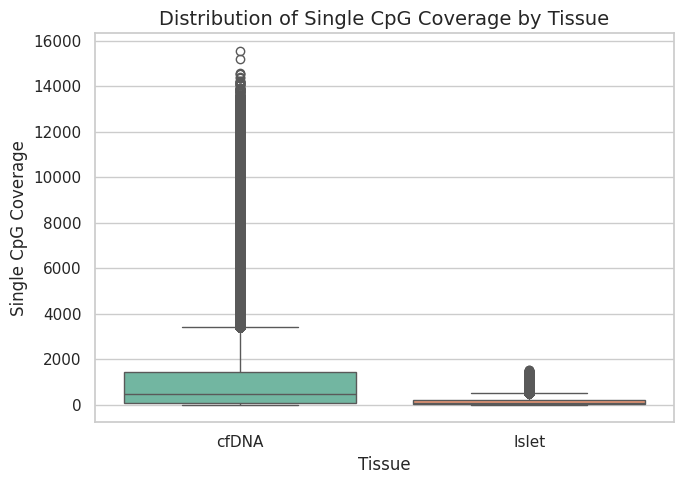

In [7]:
# b. Generate plots summarizing the coverage statistics
# Set up the plotting style
sns.set(style="whitegrid")

# Boxplot for coverage by tissue
plt.figure(figsize=(7,5))
sns.boxplot(x='Tissue', y='Single_CpG_Coverage', data=data_copy, palette="Set2")
plt.title("Distribution of Single CpG Coverage by Tissue", fontsize=14)
plt.xlabel("Tissue", fontsize=12)
plt.ylabel("Single CpG Coverage", fontsize=12)
plt.tight_layout()
plt.show()

<ipython-input-8-0f0964bbab7f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Tissue', y='Single_CpG_Coverage', data=data_copy, palette="muted")


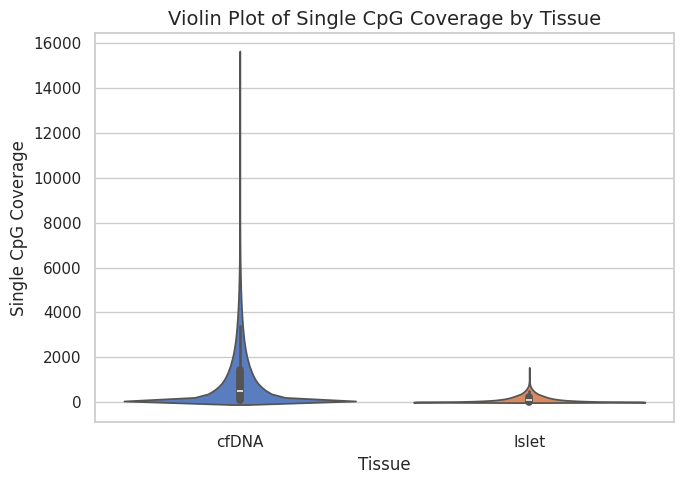

In [8]:
# Violin plot for a detailed view of coverage distribution
plt.figure(figsize=(7,5))
sns.violinplot(x='Tissue', y='Single_CpG_Coverage', data=data_copy, palette="muted")
plt.title("Violin Plot of Single CpG Coverage by Tissue", fontsize=14)
plt.xlabel("Tissue", fontsize=12)
plt.ylabel("Single CpG Coverage", fontsize=12)
plt.tight_layout()
plt.show()

In [9]:
# Reshape the DataFrame for proper plotting (bar plot)
coverage_stats_reset = coverage_stats.reset_index()  # Reset index to include Tissue as a column
coverage_stats_melted = coverage_stats_reset.melt(id_vars="Tissue", value_vars=["Median", "CV"],
                                                  var_name="Statistic", value_name="Value")


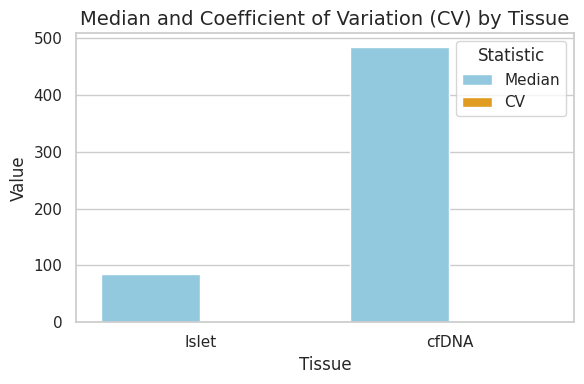

In [27]:
# # Bar plot for Median and CV
# plt.figure(figsize=(6,4))
# sns.barplot(x="Tissue", y="Value", hue="Statistic", data=coverage_stats_melted, palette=["skyblue", "orange"])
# plt.title("Median and Coefficient of Variation (CV) by Tissue", fontsize=14)
# plt.ylabel("Value", fontsize=12)
# plt.xlabel("Tissue", fontsize=12)
# plt.legend(title="Statistic")
# plt.tight_layout()
# plt.show()

# ## since Median value is too large when compared to CV therefore CV is negligible on the plot

2. Biomarker Identification

a. Identify PMPs with high specificity for tissue differentiation, minimizing false
positives for Tissue #1 while allowing some false negatives. Use statistical or
machine learning approaches to assign confidence (e.g., p-values) to each PMP

In [10]:
# Calculate the total coverage across all methylation states for each PMP
coverage_columns = ['000', '001', '010', '011', '100', '101', '110', '111']

# a. Identify PMPs with high specificity for tissue differentiation
# Perform t-tests to identify PMPs with significantly different coverage between tissues
tissues = data_copy['Tissue'].unique()
tissue1 = data_copy[data_copy['Tissue'] == tissues[0]]
tissue2 = data_copy[data_copy['Tissue'] == tissues[1]]

In [11]:
# Group data by tissue and CpG_Coordinates
grouped = data_copy.groupby(['Tissue', 'CpG_Coordinates'])['Single_CpG_Coverage'].apply(list).unstack(level=0)
# Ensure that data for both tissues exists for each CpG_Coordinate
grouped = grouped.dropna()

In [12]:
grouped.isna().sum()

,0
Tissue,
Islet,0
cfDNA,0


In [13]:
# Perform t-test for each CpG_Coordinate

pmp_pvalues = []
for cpg_coord in grouped.index:
    tissue1_coverage = grouped.loc[cpg_coord, tissues[0]]
    tissue2_coverage = grouped.loc[cpg_coord, tissues[1]]
    # Perform t-test
    _, pvalue = ttest_ind(tissue1_coverage, tissue2_coverage, equal_var=False)
    pmp_pvalues.append((cpg_coord, pvalue))

# Convert the results to a DataFrame
pmp_pvalues = pd.DataFrame(pmp_pvalues, columns=['CpG_Coordinates', 'p-value'])

# Sort PMPs by p-value to find the most specific ones
pmp_pvalues = pmp_pvalues.sort_values(by='p-value')

# Apply a threshold for significance (e.g., p-value < 0.05)
significant_pmps = pmp_pvalues[pmp_pvalues['p-value'] < 0.05]
print("Significant PMPs:")
print(significant_pmps)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1087: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1087: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


Significant PMPs:
      CpG_Coordinates        p-value
20704  5092:5116:5180  1.646204e-122
20698  5081:5116:5180  4.917519e-121
20695  5081:5092:5180  4.943017e-121
20694  5081:5092:5116  4.503437e-117
19188  2655:2664:2668  2.103671e-116
...               ...            ...
54062  8851:8855:8994   4.908565e-02
54179  8851:8904:8994   4.908565e-02
54095  8851:8867:8994   4.908565e-02
54187  8851:8911:8994   4.908565e-02
31670  7869:7964:8005   4.972970e-02

[64932 rows x 2 columns]


In [14]:
coverage_columns

['000', '001', '010', '011', '100', '101', '110', '111']

Implementing Random Forest Classifier



In [15]:
# using Random Forest for tissue differentiation
# Prepare data for classification
X = data_copy[coverage_columns]
y = data_copy['Tissue'].apply(lambda x: 1 if x == tissues[1] else 0)  # Encode tissue labels as binary

In [16]:
print(X.shape)
print(y.shape)

(15392183, 8)
(15392183,)


In [17]:
y.value_counts()
# cfDNA - 0 -	11602083
# Islet	- 1 - 3790100

,count
Tissue,
0,11602083
1,3790100


In [18]:
# splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10774528, 8)
(4617655, 8)
(10774528,)
(4617655,)


Note: Training of ML model (RandomForestClassifier) and further predictions were done in server for such a large no. of data because system can crash if run in the local system

In [ ]:
# Train a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Prediction of the model
y_pred = rf_model.predict(X_test)

In [ ]:
# Done in server
# Evaluate the Accuracy
print("\nAccuracy:")
accuracy = accuracy_score(y_test, y_pred)

# Evaluate the result
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred))

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=rf_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.savefig("conf_matrix.png")
plt.show()

# Feature importances (PMPs with high importance for tissue differentiation)
feature_importances = pd.DataFrame({
    'PMP': coverage_columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nTop PMPs by Importance:")
print(feature_importances)

b. Calculate the mean variant read fraction (VRF) for each PMP in both tissues

In [20]:
# b. Calculate the mean variant read fraction (VRF) for each PMP in both tissues
# VRF = Methylated Reads / Total Reads for each PMP
data_copy['VRF'] = data_copy['111'] / data_copy['Single_CpG_Coverage']

# Calculate mean VRF for each PMP in both tissues
mean_vrf_tissue1 = data_copy[data_copy['Tissue'] == tissues[0]].groupby('CpG_Coordinates')['VRF'].mean().reset_index()
mean_vrf_tissue2 = data_copy[data_copy['Tissue'] == tissues[1]].groupby('CpG_Coordinates')['VRF'].mean().reset_index()

In [21]:
# Merge the results into a single table
mean_vrf = pd.merge(mean_vrf_tissue1, mean_vrf_tissue2, on='CpG_Coordinates', suffixes=('_Tissue1', '_Tissue2'))
print("\nMean VRF for PMPs:")
print(mean_vrf)


Mean VRF for PMPs:
         CpG_Coordinates  VRF_Tissue1  VRF_Tissue2
0      10035:10044:10046     0.009426     0.001733
1      10035:10044:10053     0.008795     0.001178
2      10035:10044:10058     0.008276     0.001208
3      10035:10044:10071     0.009283     0.001314
4      10035:10044:10075     0.009165     0.001765
...                  ...          ...          ...
65392   9998:10121:10133     0.005033     0.000957
65393   9998:10121:10140     0.000776     0.000000
65394   9998:10130:10133     0.001307     0.000347
65395   9998:10130:10140     0.000776     0.000000
65396   9998:10133:10140     0.000776     0.000000

[65397 rows x 3 columns]


3. Address the following questions

a. How does sequencing depth affect specificity confidence?

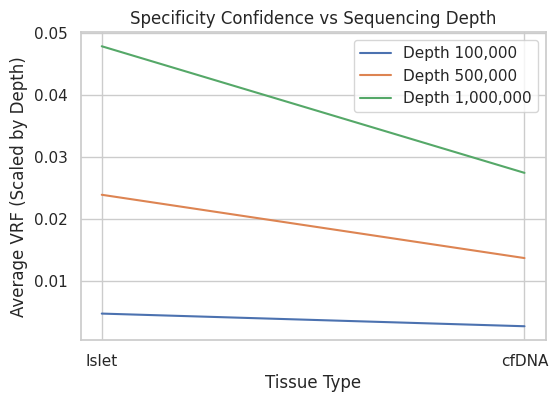

In [22]:
# Simulate different sequencing depths (e.g., 100k, 500k, 1M reads) by scaling the VRF values
depths = [100000, 500000, 1000000]
vrf_depths = {}

for depth in depths:
    # Scale the VRF based on the new depth (this is a simple simulation, you can refine this)

    data_copy['VRF_scaled'] = data_copy['VRF'] * (depth / 1000000)

    # Compute the specificity for each depth (using VRF as a proxy for specificity)
    specificity = data_copy.groupby('Tissue')['VRF_scaled'].mean()
    vrf_depths[depth] = specificity

# Plot how specificity changes with different depths
fig, ax = plt.subplots(figsize=(6,4))
for depth, specificity in vrf_depths.items():
    ax.plot(specificity.index, specificity.values, label=f'Depth {depth:,}')

ax.set_xlabel('Tissue Type')
ax.set_ylabel('Average VRF (Scaled by Depth)')
ax.set_title('Specificity Confidence vs Sequencing Depth')
ax.legend()
plt.savefig("depth_variations_specificity.png")
plt.show()

b. For the top 10 PMPs, estimate the threshold of reads required to confidently call Tissue #2 at a sequencing depth of 1 million reads.

This step is done in server as training the model was completed there and since it requires feature_importances using the model

In [ ]:
# Select top 10 PMPs by importance
top_10_pmp = feature_importances.head(10)

# Initialize a dictionary to store thresholds
thresholds = {}

for pmp in top_10_pmp['PMP']:
    # Filter for Tissue #2 and the current PMP
    tissue2_data = data_copy[(data_copy['Tissue'] == tissues[1]) & (data_copy['CpG_Coordinates'] == pmp)]

    # Check if there is any data for the current PMP in Tissue #2
    if not tissue2_data.empty:
        mean_vrf_tissue2 = tissue2_data['VRF'].mean()

        # Assuming that the threshold is related to the VRF value for Tissue #2
        # Define the threshold based on the VRF value at 1 million reads
        threshold = mean_vrf_tissue2 * 1000000  # This is an approximation; adjust logic as needed
        thresholds[pmp] = threshold
    else:
        # If no data is found, set the threshold to NaN or 0
        thresholds[pmp] = None  # Or set to 0 if needed

# Create a DataFrame for thresholds
threshold_df = pd.DataFrame(list(thresholds.items()), columns=['PMP', 'Threshold_Reads'])

# Drop rows with NaN thresholds (optional)
threshold_df = threshold_df.dropna()

print("\nEstimated Thresholds for Top 10 PMPs at 1M Reads:")
print(threshold_df)

# Plot VRF comparison for the top 10 PMPs vs individual CpG sites (if applicable)
if not threshold_df.empty:
    fig, ax = plt.subplots(figsize=(10, 6))
    threshold_df.plot(kind='bar', x='PMP', y='Threshold_Reads', ax=ax, legend=False)

    ax.set_xlabel('PMP')
    ax.set_ylabel('Threshold Reads')
    ax.set_title('Threshold Reads for Top 10 PMPs')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig("vrf_plot.png")
    plt.show()
else:
    print("No valid threshold data to plot.")


c. Validate the hypothesis by comparing the specificity of the top 10 PMPs against individual CpG sites.

This step is also done in server since it is the continuation of the previous step.

In [ ]:
# Filter for the top 10 PMPs based on CpG coordinates
top_10_pmp_data = data_copy[data_copy['CpG_Coordinates'].isin(top_10_pmp['PMP'])]

# Drop rows with NaN values in the VRF column
top_10_pmp_data = top_10_pmp_data.dropna(subset=['VRF'])

# Group by CpG site and calculate mean VRF for both tissues
vrf_comparison = top_10_pmp_data.groupby(['CpG_Coordinates', 'Tissue'])['VRF'].mean().unstack()

# Ensure there is numeric data for plotting
if not vrf_comparison.empty:
    # Plot VRF comparison for the top 10 PMPs vs individual CpG sites
    fig, ax = plt.subplots(figsize=(10, 6))
    vrf_comparison.plot(kind='bar', ax=ax)

    ax.set_xlabel('CpG Coordinates')
    ax.set_ylabel('Average VRF')
    ax.set_title('VRF Comparison for Top 10 PMPs vs Individual CpG Sites')
    plt.xticks(rotation=90)
    plt.legend(title="Tissue", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.savefig("pmp_specificity.png")
    plt.show()
else:
    print("No valid data to plot for VRF comparison.")


#Task 2: NGS Data Analysis

1. Quality Control (FastQC) and Alignment is done in linux server

2.b.ii. Custom Code Development: Write your own scripts,
leveraging tools like Samtools, bcftools, or Python/R
libraries, to perform mutation detection and calculate the
required metrics.

In [28]:

# Load the data into a pandas DataFrame
# 'somatic_variants_extracted.tsv' file was extracted from somatic_variants_filtered.vcf after variant calling
data_file = "/content/somatic_variants_extracted.tsv"
df = pd.read_csv(data_file, sep="\t")

# Rename columns for easier access
df.columns = ["CHROM", "POS", "REF", "ALT", "QUAL", "DP", "AD"]

# Function to calculate Variant Allele Frequency (VAF)
def calculate_vaf(ad, dp):
    try:
        alt_counts = list(map(int, ad.split(",")))[1:]
        return [round(count / dp, 4) if dp > 0 else 0 for count in alt_counts]
    except Exception as e:
        print(f"Error calculating VAF for AD={ad}, DP={dp}: {e}")
        return []

# Parse AD column and calculate VAF for each variant
df["VAF"] = df.apply(lambda row: calculate_vaf(row["AD"], row["DP"]), axis=1)

# Filter variants based on a VAF threshold (e.g., >0.01)
vaf_threshold = 0.01
df_filtered = df[df["VAF"].apply(lambda x: any(v > vaf_threshold for v in x))]

# print(f"Filtered variants saved to {output_file}")
df_filtered

#Conclusion: Only the most relevant variants are considered for downstream analysis, thereby improving the quality and accuracy of mutation analysis in genomic studies.


,CHROM,POS,REF,ALT,QUAL,DP,AD,VAF
0,chr1,27100175,A,G,.,459515,"444,15490,25","[0.0337, 0.0001]"
1,chr1,27100181,CGCA,C,.,415538,"407,8517,21","[0.0205, 0.0001]"
2,chr1,27100191,G,"A,GCAGCAGCAACAGCAA",.,507669,"437,28,42612,23,34","[0.0001, 0.0839, 0.0, 0.0001]"
3,chr1,27100197,G,A,.,494694,"484,10687,7","[0.0216, 0.0]"
4,chr1,27100200,G,A,.,495699,"485,10692,7","[0.0216, 0.0]"
...,...,...,...,...,...,...,...,...
92,chr19,15725246,A,G,.,194141,"173,21130,11","[0.1088, 0.0001]"
93,chr19,19389340,C,T,.,4563,"41,463,0","[0.1015, 0.0]"
94,chr19,49978965,G,C,.,529,"3,228,1","[0.431, 0.0019]"
95,chr22,17053012,C,A,.,73101,"66,797,4","[0.0109, 0.0001]"


c. Use the normal tissue to calculate the median background mutation level.
The background mutation level accounts for sequencing errors or biases
that can mimic true mutations. Determine how many reads per million are
required to confidently call a given mutation.

In [25]:
# Calculate median background mutation level from normal tissue
def calculate_background_mutation_level(df):
    background_vaf = []
    for ad, dp in zip(df["AD"], df["DP"]):
        alt_counts = list(map(int, ad.split(",")))[1:]
        background_vaf.extend([count / dp for count in alt_counts if dp > 0])
    return pd.Series(background_vaf).median()

# Assuming the normal tissue data is provided in the same format
normal_data_file = "/content/somatic_variants_extracted.tsv"
df_normal = pd.read_csv(normal_data_file, sep="\t")
df_normal.columns = ["CHROM", "POS", "REF", "ALT", "QUAL", "DP", "AD"]

median_background_mutation_level = calculate_background_mutation_level(df_normal)
print(f"Median background mutation level: {median_background_mutation_level}")

# Determine the number of reads per million required to confidently call a mutation
def reads_per_million_threshold(median_background, confidence=0.99):
    # Assuming a simple model where threshold is inversely proportional to confidence
    return int((1 / median_background) * confidence * 1e6)

required_reads_per_million = reads_per_million_threshold(median_background_mutation_level)
print(f"Reads per million required to confidently call a mutation: {required_reads_per_million}")


Median background mutation level: 0.0004705909177339249
Reads per million required to confidently call a mutation: 2103738008


Conclusion: The median background mutation level of 0.00047 indicates the baseline noise in the sequencing process and a threshold of 2.1 billion reads per million is required to confidently call a mutation. This high threshold ensures that mutations detected are not due to sequencing errors or biases, thereby increasing the accuracy and reliability of the mutation calls.

All the results and plots are provided in the report file.